As always, import the necessary libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [10]:
sklearn.__version__

'0.18.1'

Importing our numeric data

In [11]:
df = pd.read_csv('data/players_with features_no_nan_only_num_values.csv')

These are all the features we have in our cleaned dataset

In [12]:
orig_cols = ['height', 
        'weight', 
        'games', 
        'victories', 
        'ties', 
        'defeats', 
        'goals', 
        'skin_colour', 
        'yellowCards',
        'yellowReds', 
        'redCards',
        'gravity', 
        'meanIAT_yellowReds', 
        'meanIAT_redCards', 
        'meanExp_yellowReds', 
        'meanExp_redCards',
        'meanIAT_yellowCards', 
        'meanIAT_gravity',
        'meanExp_yellowCards', 
        'meanExp_redCards', 
        'meanExp_gravity'
       ]

Comment out features you **want** to use

In [13]:
cols = ['height', 
        'weight', 
        'games', 
        'victories', 
        'ties', 
        'defeats', 
        'goals', 
        'skin_colour', 
        #'yellowCards',
        'yellowReds', 
        'redCards',
        #'gravity', 
        'meanIAT_yellowReds', 
        'meanIAT_redCards', 
        'meanExp_yellowReds', 
        'meanExp_redCards',
        #'meanIAT_yellowCards', 
        #'meanIAT_gravity',
        #'meanExp_yellowCards', 
        'meanExp_redCards', 
        #'meanExp_gravity'
       ]

# create labels for feature_importances_ graph
cols_labels = [y for y in orig_cols if not (y in cols)]

In [32]:
def separator(x):
    if x <= 0.25:
        return 0
    elif x <= 0.5:
        return 1
    elif x <= 0.75:
        return 2
    elif x <= 1.:
        return 3

def binary_separator(x):
    if x <= 0.5:
        return 0
    else:
        return 1
    
def prepare_data(df, cols, sep):
    target = df['skin_colour']
    target = target.apply(sep)
    
    data = df.drop(cols, axis=1).as_matrix()
    print('data shape: '+str(data.shape))
    print('target shape: '+str(target.shape))
    return data, target

In [34]:
b = binary_separator
data, target = prepare_data(df, cols, b)

data shape: (1419, 6)
target shape: (1419,)


In [16]:
forest = RandomForestClassifier(n_estimators = 100)

First, we try training/testing on the entire dataset

In [251]:
forest.fit(data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [252]:
pred1 = forest.predict(data)

In [253]:
print(metrics.accuracy_score(target, pred1))

0.996476391825


Seems quite overfitted.. Let's try a train/test split!

In [17]:
# train/test library import
from sklearn.cross_validation import train_test_split

/Users/Jonas/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3)

In [31]:
# fit
forest.fit(data_train, target_train)
# predict
pred = forest.predict(data_test)
# print accuracy_score
print(metrics.accuracy_score(target_test, pred))

0.821596244131


In [26]:
len(pred)

426

In [27]:
test = [pred == target_test]

In [28]:
sum(sum(test))

345

In [29]:
sum(sum(test))/len(pred)

0.8098591549295775

Heavily inspired by http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

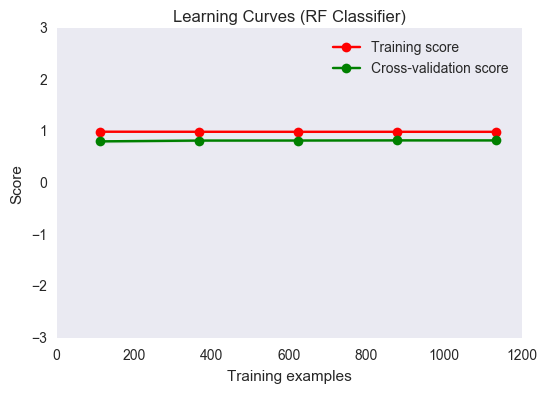

In [240]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = data, target


title = "Learning Curves (RF Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators=100)
plot_learning_curve(estimator, title, X, y, ylim=(-3, 3), cv=cv, n_jobs=1)

plt.show()

In [262]:
imp = forest.feature_importances_

In [263]:
imp

array([ 0.13868689,  0.1511268 ,  0.18308152,  0.17351589,  0.1804116 ,
        0.1731773 ])

In [264]:
cols_labels

['yellowCards',
 'gravity',
 'meanIAT_yellowCards',
 'meanIAT_gravity',
 'meanExp_yellowCards',
 'meanExp_gravity']

In [265]:
importance = pd.DataFrame([forest.feature_importances_], columns = cols_labels)
importance.columns

Index(['yellowCards', 'gravity', 'meanIAT_yellowCards', 'meanIAT_gravity',
       'meanExp_yellowCards', 'meanExp_gravity'],
      dtype='object')

In [266]:
n_col = data.shape[1]

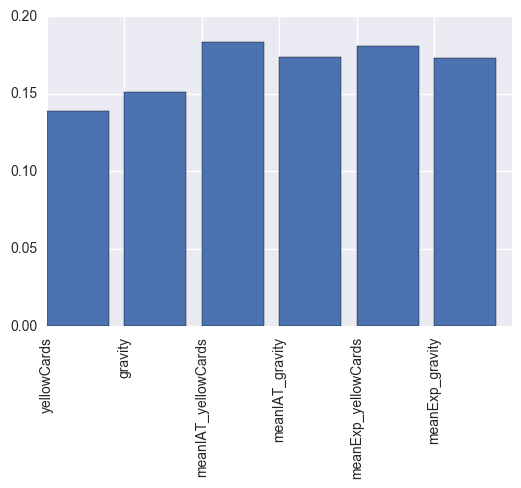

In [267]:
fig, ax = plt.subplots()
ax.bar(range(len(imp)), imp)
ax.set_xticks(range(0, n_col))
ax.set_xticklabels(importance.columns, rotation=90)

In [59]:
from sklearn.cross_validation import cross_val_score

In [60]:
f = RandomForestClassifier(n_estimators = 100)

In [61]:
scores = cross_val_score(f, data, target, cv=30, scoring='accuracy')

In [62]:
scores

array([ 0.6875    ,  0.70833333,  0.6875    ,  0.70833333,  0.70833333,
        0.70833333,  0.70833333,  0.70833333,  0.6875    ,  0.70833333,
        0.70833333,  0.70833333,  0.66666667,  0.6875    ,  0.70833333,
        0.70833333,  0.70833333,  0.70833333,  0.72916667,  0.6875    ,
        0.6875    ,  0.70833333,  0.70833333,  0.68085106,  0.7173913 ,
        0.73333333,  0.73333333,  0.75      ,  0.75      ,  0.68181818])

idea: use a hold-out sample

In [63]:
scores.mean()

0.70641868499985994